# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Ahmed Sharaf\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [8]:
# Check No Duplicat Row
df.duplicated().sum()

0

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Handle Types          <br>
2- Handle Nulls<br>
3-           <br>

In [10]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [12]:
# Handle Types Of Each Columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [19]:
#solution 
for col in df_copy.columns[2:]:
    if df_copy[col].dtype == 'O':
        df_copy[col] = df_copy[col].str.replace(',', '')
        df_copy[col] = pd.to_numeric(df_copy[col])

In [20]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    int64  
 5   Coastline (coast/area ratio)        227 non-null    int64  
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Second issue**

In [26]:
# Handle Null Be Fill With Median Because Robust to outliers
df_null = df_copy.isna().sum().reset_index().rename(columns = {0: 'count'})
df_null = df_null[df_null['count'] > 0]
df_null

,index,count
6,Net migration,3
7,Infant mortality (per 1000 births),3
8,GDP ($ per capita),1
9,Literacy (%),18
10,Phones (per 1000),4
11,Arable (%),2
12,Crops (%),2
13,Other (%),2
14,Climate,22
15,Birthrate,3


In [38]:
#solution 
for col in df_null['index'].values:
    if df_copy[col].dtype == 'O':
        df_copy[col] = df_copy[col].fillna(df_copy[col].value_counts(ascending = False).index[0])
    else :
        df_copy[col] = df_copy[col].fillna(df_copy[col].median())

In [40]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    int64  
 5   Coastline (coast/area ratio)        227 non-null    int64  
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

**Third issue**

array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Area (sq. mi.)'}>,
        <Axes: title={'center': 'Pop. Density (per sq. mi.)'}>,
        <Axes: title={'center': 'Coastline (coast/area ratio)'}>],
       [<Axes: title={'center': 'Net migration'}>,
        <Axes: title={'center': 'Infant mortality (per 1000 births)'}>,
        <Axes: title={'center': 'GDP ($ per capita)'}>,
        <Axes: title={'center': 'Literacy (%)'}>],
       [<Axes: title={'center': 'Phones (per 1000)'}>,
        <Axes: title={'center': 'Arable (%)'}>,
        <Axes: title={'center': 'Crops (%)'}>,
        <Axes: title={'center': 'Other (%)'}>],
       [<Axes: title={'center': 'Climate'}>,
        <Axes: title={'center': 'Birthrate'}>,
        <Axes: title={'center': 'Deathrate'}>,
        <Axes: title={'center': 'Agriculture'}>],
       [<Axes: title={'center': 'Industry'}>,
        <Axes: title={'center': 'Service'}>, <Axes: >, <Axes: >]],
      dtype=object)

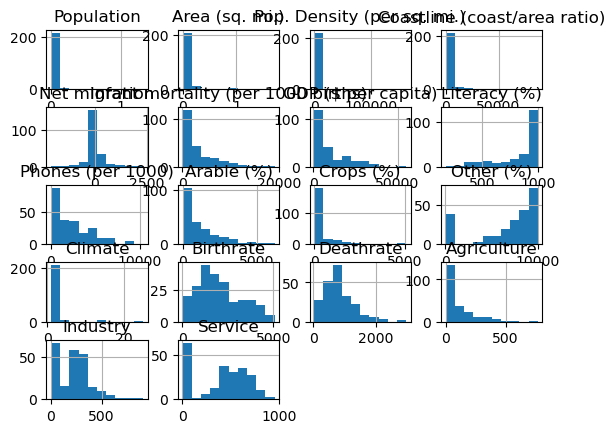

In [44]:
# We Need Handle Outliers
df_copy.hist()

In [55]:
# Solution (Clamping Outliers)
def calc_bound(df, col):
    Q1, Q3 = np.percentile(df_copy[col], [25, 75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    return upper_bound, lower_bound

def clamp_outlier(u, l, v):
    if v > u:
        return u
    elif v < l:
        return l
    else :
        return v

for col in df_copy.columns[2:]:
    u, l = calc_bound(df_copy, col)
    df_copy[col] = df_copy[col].apply(lambda x: clamp_outlier(u,l,x))

In [57]:
# test
df_copy.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,1.180475e+07,2.825530e+05,1319.689427,677.040749,4.290749,3052.375551,9576.872247,840.792952,2344.070485,1121.837004,267.351322,6832.927313,2.257709,2039.588106,794.845815,97.457048,219.275330,398.504405
std,1.489275e+07,3.798371e+05,1350.854188,997.427720,171.205248,3182.835247,9693.023008,179.066869,2241.426329,1161.299011,350.669296,3213.267507,0.827284,1221.057094,440.026310,103.061210,161.422862,254.352797
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-279.250000,19.000000,500.000000,443.000000,2.000000,0.000000,0.000000,193.500000,1.000000,10.000000,22.000000,0.000000,1.000000,4.000000
25%,4.376240e+05,4.647500e+03,291.500000,10.000000,-65.500000,658.500000,1900.000000,764.000000,385.000000,190.000000,10.000000,5650.500000,2.000000,1090.500000,522.500000,18.000000,43.000000,73.500000
50%,4.786994e+06,8.660000e+04,788.000000,73.000000,0.000000,1731.000000,5550.000000,925.000000,1762.000000,696.000000,89.000000,8015.000000,2.000000,1799.500000,713.000000,55.000000,231.000000,475.500000
75%,1.749777e+07,4.418110e+05,1901.500000,1034.500000,77.000000,4875.000000,15700.000000,978.000000,3829.000000,1747.000000,401.500000,9288.500000,3.000000,2909.000000,1018.500000,146.500000,309.500000,603.000000
max,4.308800e+07,1.097556e+06,4316.500000,2571.250000,290.750000,11199.750000,36400.000000,1000.000000,8995.000000,4082.500000,988.750000,9998.000000,4.500000,5073.000000,1762.500000,339.250000,709.250000,787.000000


**Fourth issue**

In [58]:
# We Need To Handle Skewness
df_sk = df_copy.copy()
for col in df_sk.columns[2:]:
    df_sk[col] = df_sk[col].apply(lambda x : np.log(1 + np.abs(x)))

array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Area (sq. mi.)'}>,
        <Axes: title={'center': 'Pop. Density (per sq. mi.)'}>,
        <Axes: title={'center': 'Coastline (coast/area ratio)'}>],
       [<Axes: title={'center': 'Net migration'}>,
        <Axes: title={'center': 'Infant mortality (per 1000 births)'}>,
        <Axes: title={'center': 'GDP ($ per capita)'}>,
        <Axes: title={'center': 'Literacy (%)'}>],
       [<Axes: title={'center': 'Phones (per 1000)'}>,
        <Axes: title={'center': 'Arable (%)'}>,
        <Axes: title={'center': 'Crops (%)'}>,
        <Axes: title={'center': 'Other (%)'}>],
       [<Axes: title={'center': 'Climate'}>,
        <Axes: title={'center': 'Birthrate'}>,
        <Axes: title={'center': 'Deathrate'}>,
        <Axes: title={'center': 'Agriculture'}>],
       [<Axes: title={'center': 'Industry'}>,
        <Axes: title={'center': 'Service'}>, <Axes: >, <Axes: >]],
      dtype=object)

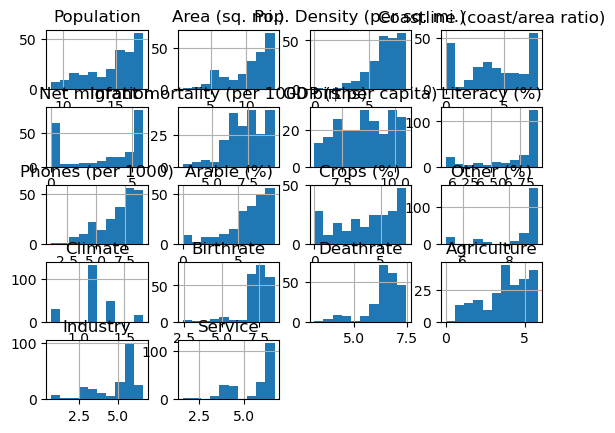

In [59]:
df_sk.hist()

**Five issue**

In [63]:
# handle categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df_copy.columns[:2]:
    df_copy[col] = encoder.fit_transform(df_copy[col])
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997.0,647500.00,480.0,0.00,290.75,11199.75,700.0,443.0,32.0,1213.0,22.00,8765.0,1.0,466.0,1762.5,38.0,24.0,38.0
1,1,3,3581655.0,28748.00,1246.0,126.00,-279.25,2152.00,4500.0,865.0,712.0,2109.0,442.00,7449.0,3.0,1511.0,522.0,232.0,188.0,579.0
2,2,6,32930091.0,1097556.25,138.0,4.00,-39.00,31.00,6000.0,700.0,781.0,322.0,25.00,9653.0,1.0,1714.0,461.0,101.0,6.0,298.0
3,3,8,57794.0,199.00,2904.0,2571.25,-279.25,927.00,8000.0,970.0,2595.0,10.0,15.00,193.5,2.0,2246.0,327.0,55.0,231.0,475.5
4,4,10,71201.0,468.00,1521.0,0.00,66.00,405.00,19000.0,1000.0,4972.0,222.0,0.00,9778.0,3.0,871.0,625.0,55.0,231.0,475.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,5,2460492.0,5860.00,4199.0,0.00,290.75,1962.00,800.0,925.0,1452.0,169.0,988.75,6413.0,3.0,3167.0,392.0,9.0,28.0,63.0
223,223,6,273008.0,266000.00,10.0,42.00,0.00,1731.00,5550.0,925.0,1762.0,2.0,0.00,9998.0,1.0,1799.5,713.0,55.0,231.0,4.0
224,224,5,21456188.0,527970.00,406.0,36.00,0.00,615.00,800.0,502.0,372.0,278.0,24.00,9698.0,1.0,4289.0,83.0,135.0,472.0,393.0
225,225,9,11502010.0,752614.00,153.0,0.00,0.00,8829.00,800.0,806.0,82.0,708.0,3.00,929.0,2.0,41.0,1762.5,22.0,29.0,489.0


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [60]:
from sklearn import preprocessing

In [65]:
scaler_stand = preprocessing.StandardScaler()
df_stand = scaler_stand.fit_transform(df_copy)

scaler_minmax = preprocessing.MinMaxScaler()
df_minmax = scaler_minmax.fit_transform(df_copy)


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters <br>
    - Complete-Linkage Clustering <br>
    - Single-Linkage Clustering   <br>
    - Average-Linkage Clustering  <br>
    - Centroid Linkage Clustering <br>
2- Distance function:  <br>
    - Euclidean Distance <br>
    - Manhattan Distance <br>
    - Mahalanobis distance <br>
3- Number of clusters <br>


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### First (linkage = single, method = 'Euclidean')

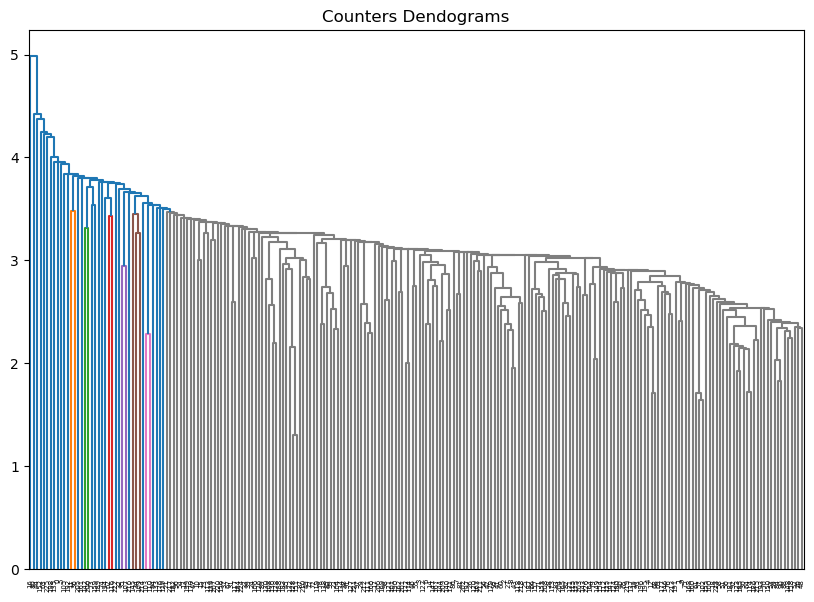

In [70]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_stand , method='single',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [78]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
cluster = AgglomerativeClustering(metric='euclidean', n_clusters = 2, linkage = 'single').fit(df_stand)
silhouette_score(df_stand, labels = cluster.labels_)

0.13901771006165817

### second (linkage = complete, method = 'Euclidean')

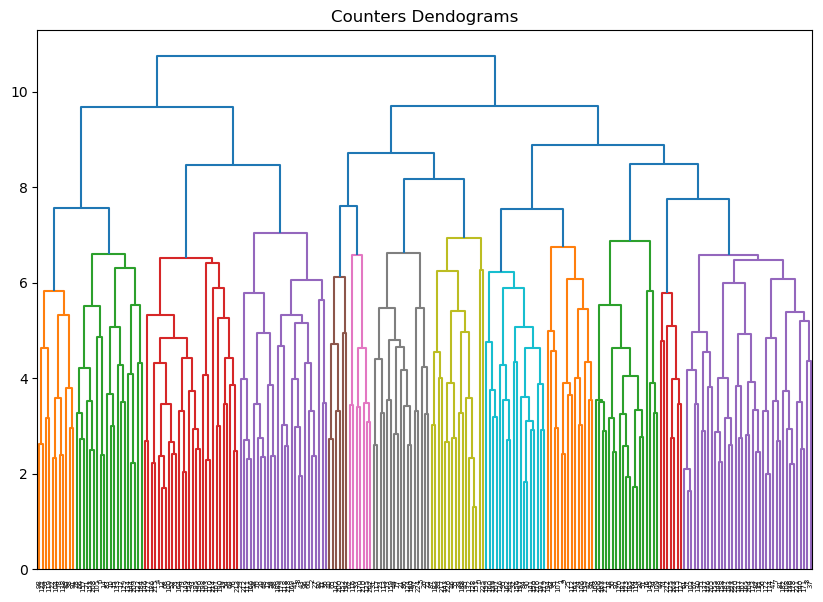

In [79]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_stand , method='complete',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [91]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
cluster = AgglomerativeClustering(metric='euclidean', n_clusters = 2, linkage = 'complete').fit(df_stand)
silhouette_score(df_stand, labels = cluster.labels_)

0.10204870297151546

### Third (linkage = Average, method = 'Euclidean')

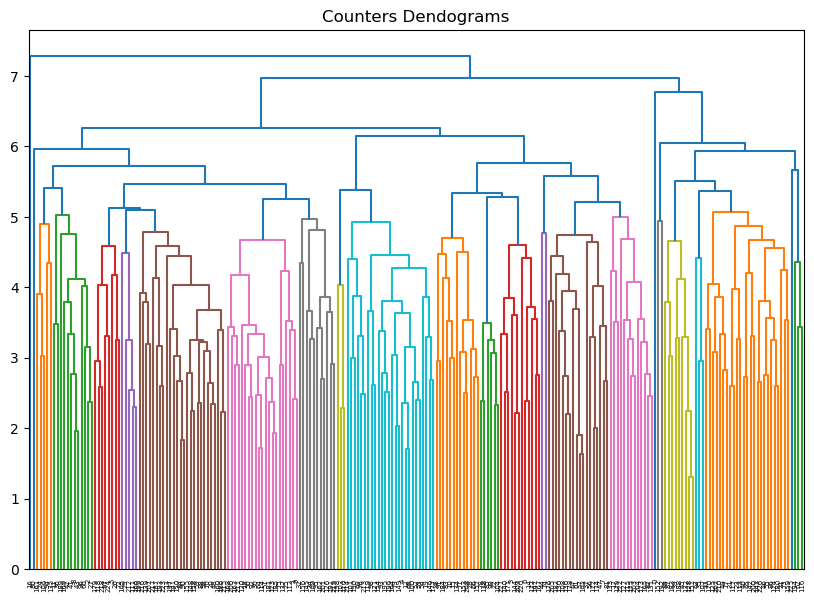

In [92]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_stand , method='average',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [98]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
cluster = AgglomerativeClustering(metric='euclidean', n_clusters = 2, linkage = 'average').fit(df_stand)
silhouette_score(df_stand, labels = cluster.labels_)

0.13901771006165817

### Four (linkage = Centroid, method = 'Euclidean')

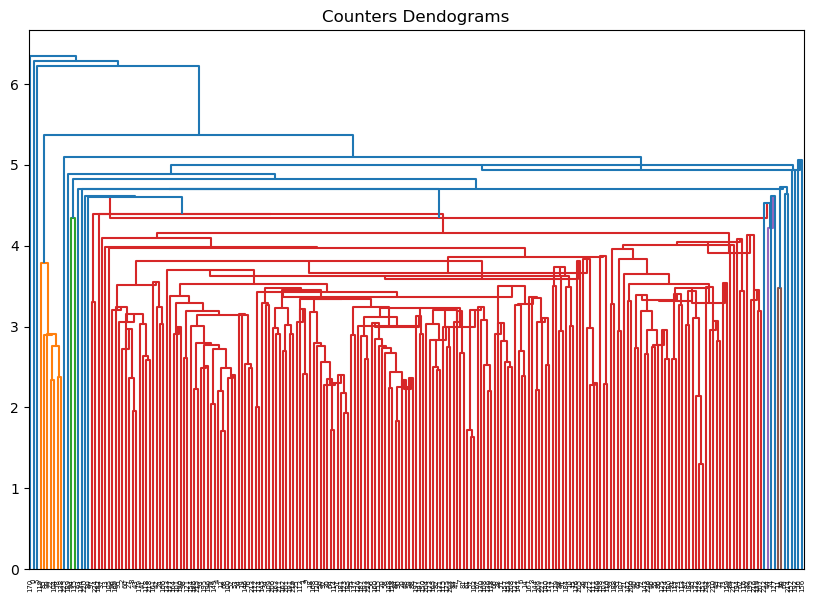

In [100]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_stand , method='centroid'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [106]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
cluster = AgglomerativeClustering(metric='euclidean', n_clusters = 2, linkage = 'ward').fit(df_stand)
silhouette_score(df_stand, labels = cluster.labels_)

0.13726143804370478